The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount). 

since V (hidden) features transformed by PCA, we can say V features have been scaled

In [68]:
import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec

# Classification models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, plot_importance as xg_importance
from lightgbm import LGBMClassifier, plot_importance as lgb_importance

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, \
                            precision_recall_curve,auc

# sampler objects
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)

Using TensorFlow backend.


In [18]:
file=os.listdir('input')[0]
file_path=os.getcwd()+'\\input\\'+file

In [163]:
df=pd.read_csv(file_path)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
print(df.isnull().sum().sum())
print(df.shape)

0
(284807, 31)


In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


all variables are numercial
no missing variable
shape is numercial (284807, 31)

0.1727 % of default on class ( too imbalanced data set)

min(Amount) = 0.000000	
max(Amount) = 25691.160000
mean(Amount) = 88.349619	

=> need to check by EDA(graph)





In [26]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# EDA

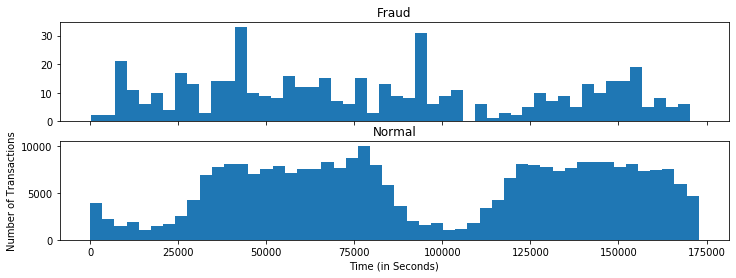

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

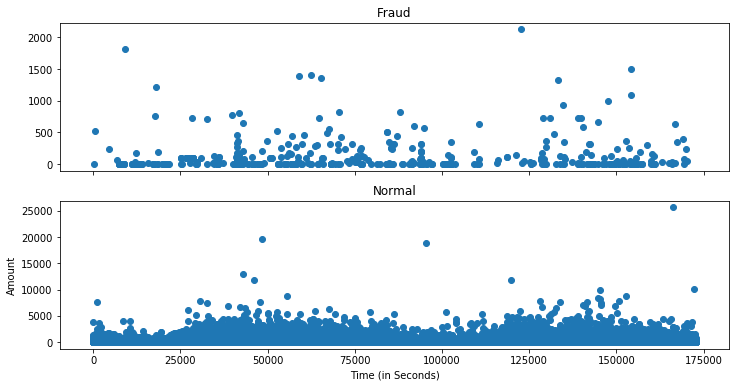

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

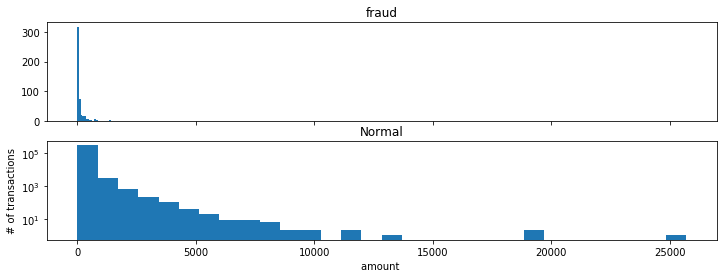

In [28]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True, figsize=(12,4))
bins=30
ax1.hist(df.Amount[df.Class==1],bins=bins)
ax1.set_title("fraud")
ax2.hist(df.Amount[df.Class==0],bins=bins)
ax2.set_title('Normal')
plt.xlabel("amount ")
plt.ylabel("# of transactions")
plt.yscale('log')
plt.show()

In [54]:
v_features = df.iloc[:,1:29].columns
print(len(v_features))

28


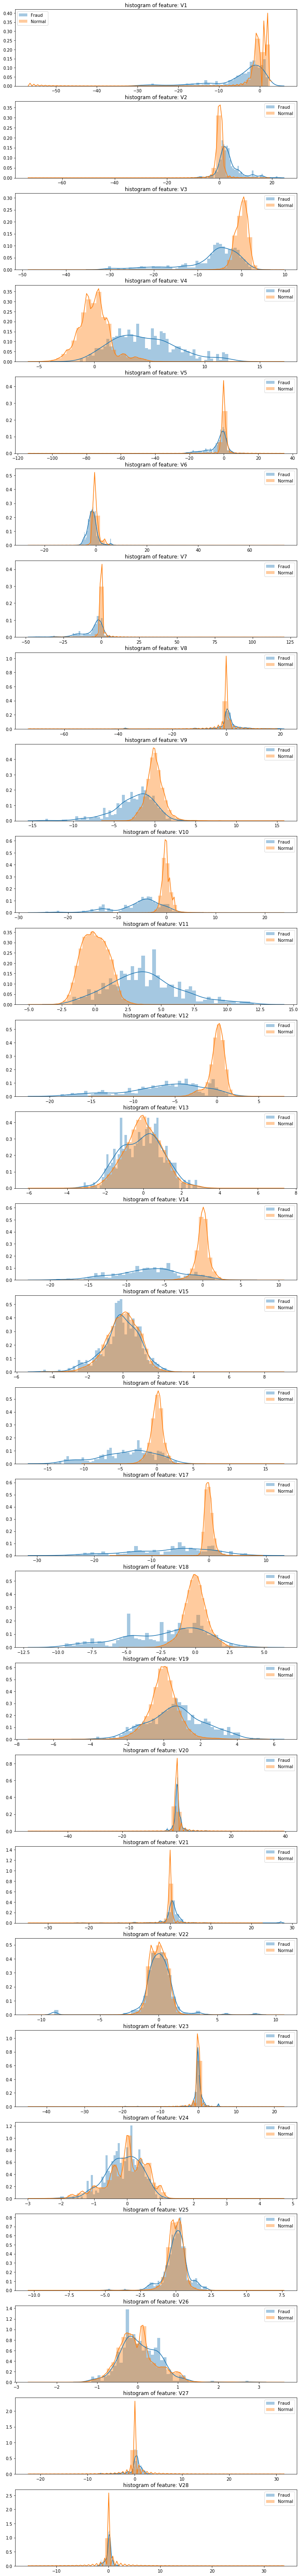

In [64]:
plt.figure(figsize=(12,4*28))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,label="Fraud")
    sns.distplot(df[cn][df.Class == 0], bins=50,label="Normal")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    plt.legend() 
plt.show()

In [164]:
#Drop all of the features that have very similar distributions between the two types of transactions.
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [87]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('accuracy : {0:.2f}, precision : {1:.2f}, recall : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [70]:
def modeling(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    metrics(y_test, pred)

In [121]:
def train_test(df):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1), \
                                        df['Class'], test_size = 0.25, random_state=0, stratify = df['Class'])
    return X_train, X_test, y_train, y_test

In [74]:
X_train, X_test, y_train, y_test = train_test(df)

In [84]:
# Check data
for a in [X_train, X_test, y_train, y_test]:
    print(a.shape)
print("")
print(y_train.value_counts())
print("")
print(y_test.value_counts())

(213605, 19)
(71202, 19)
(213605,)
(71202,)

0    213236
1       369
Name: Class, dtype: int64

0    71079
1      123
Name: Class, dtype: int64


# check base model

In [88]:
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

accuracy : 1.00, precision : 0.71, recall : 0.62
f1-score : 0.66, auc : 0.81


In [89]:
lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb, x_train = X_train, x_test = X_test, y_train = y_train, y_test = y_test)

accuracy : 1.00, precision : 0.91, recall : 0.77
f1-score : 0.84, auc : 0.89


In [146]:
xgboost=XGBClassifier()
rf=RandomForestClassifier()
extra_tree=ExtraTreesClassifier()
adaBoost=AdaBoostClassifier()
catBoost=CatBoostClassifier()
mlp=MLPClassifier()
# models=[lr,lgb,xgboost,rf,extra_tree,adaBoost,catBoost,mlp]
models=[lr,lgb,xgboost,rf,extra_tree]

In [96]:
for m in models:
    print(m.__class__)
    modeling(m, x_train = X_train, x_test = X_test, y_train = y_train, y_test = y_test)
    print("-"*25)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy : 1.00, precision : 0.71, recall : 0.62
f1-score : 0.66, auc : 0.81
-------------------------
<class 'lightgbm.sklearn.LGBMClassifier'>
accuracy : 1.00, precision : 0.91, recall : 0.77
f1-score : 0.84, auc : 0.89
-------------------------
<class 'xgboost.sklearn.XGBClassifier'>
accuracy : 1.00, precision : 0.91, recall : 0.75
f1-score : 0.82, auc : 0.87
-------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
accuracy : 1.00, precision : 0.95, recall : 0.73
f1-score : 0.83, auc : 0.87
-------------------------
<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
accuracy : 1.00, precision : 0.97, recall : 0.73
f1-score : 0.83, auc : 0.87
-------------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
accuracy : 1.00, precision : 0.81, recall : 0.69
f1-score : 0.75, auc : 0.85
-------------------------
<class 'catboost.core.CatBoostClassifier'>
Learning rate set to

141:	learn: 0.0013414	total: 6.3s	remaining: 38.1s
142:	learn: 0.0013337	total: 6.35s	remaining: 38.1s
143:	learn: 0.0013247	total: 6.39s	remaining: 38s
144:	learn: 0.0013163	total: 6.45s	remaining: 38s
145:	learn: 0.0013142	total: 6.49s	remaining: 37.9s
146:	learn: 0.0013096	total: 6.54s	remaining: 37.9s
147:	learn: 0.0013047	total: 6.58s	remaining: 37.9s
148:	learn: 0.0013018	total: 6.63s	remaining: 37.9s
149:	learn: 0.0012950	total: 6.67s	remaining: 37.8s
150:	learn: 0.0012921	total: 6.73s	remaining: 37.8s
151:	learn: 0.0012852	total: 6.77s	remaining: 37.8s
152:	learn: 0.0012827	total: 6.82s	remaining: 37.8s
153:	learn: 0.0012797	total: 6.86s	remaining: 37.7s
154:	learn: 0.0012741	total: 6.91s	remaining: 37.7s
155:	learn: 0.0012625	total: 6.95s	remaining: 37.6s
156:	learn: 0.0012589	total: 7s	remaining: 37.6s
157:	learn: 0.0012541	total: 7.04s	remaining: 37.5s
158:	learn: 0.0012519	total: 7.08s	remaining: 37.4s
159:	learn: 0.0012468	total: 7.13s	remaining: 37.4s
160:	learn: 0.001245

301:	learn: 0.0007875	total: 13.5s	remaining: 31.2s
302:	learn: 0.0007842	total: 13.6s	remaining: 31.2s
303:	learn: 0.0007832	total: 13.6s	remaining: 31.2s
304:	learn: 0.0007774	total: 13.6s	remaining: 31.1s
305:	learn: 0.0007752	total: 13.7s	remaining: 31.1s
306:	learn: 0.0007719	total: 13.7s	remaining: 31s
307:	learn: 0.0007704	total: 13.8s	remaining: 31s
308:	learn: 0.0007673	total: 13.8s	remaining: 30.9s
309:	learn: 0.0007658	total: 13.9s	remaining: 30.9s
310:	learn: 0.0007641	total: 13.9s	remaining: 30.8s
311:	learn: 0.0007621	total: 14s	remaining: 30.8s
312:	learn: 0.0007575	total: 14s	remaining: 30.8s
313:	learn: 0.0007566	total: 14.1s	remaining: 30.7s
314:	learn: 0.0007558	total: 14.1s	remaining: 30.7s
315:	learn: 0.0007520	total: 14.1s	remaining: 30.6s
316:	learn: 0.0007501	total: 14.2s	remaining: 30.6s
317:	learn: 0.0007483	total: 14.2s	remaining: 30.5s
318:	learn: 0.0007455	total: 14.3s	remaining: 30.5s
319:	learn: 0.0007421	total: 14.3s	remaining: 30.4s
320:	learn: 0.000738

464:	learn: 0.0004709	total: 21.4s	remaining: 24.7s
465:	learn: 0.0004702	total: 21.5s	remaining: 24.6s
466:	learn: 0.0004692	total: 21.5s	remaining: 24.6s
467:	learn: 0.0004676	total: 21.6s	remaining: 24.5s
468:	learn: 0.0004660	total: 21.6s	remaining: 24.5s
469:	learn: 0.0004645	total: 21.7s	remaining: 24.4s
470:	learn: 0.0004633	total: 21.7s	remaining: 24.4s
471:	learn: 0.0004619	total: 21.8s	remaining: 24.4s
472:	learn: 0.0004584	total: 21.8s	remaining: 24.3s
473:	learn: 0.0004583	total: 21.9s	remaining: 24.3s
474:	learn: 0.0004558	total: 21.9s	remaining: 24.2s
475:	learn: 0.0004539	total: 21.9s	remaining: 24.2s
476:	learn: 0.0004525	total: 22s	remaining: 24.1s
477:	learn: 0.0004503	total: 22.1s	remaining: 24.1s
478:	learn: 0.0004493	total: 22.1s	remaining: 24s
479:	learn: 0.0004477	total: 22.2s	remaining: 24s
480:	learn: 0.0004466	total: 22.2s	remaining: 24s
481:	learn: 0.0004452	total: 22.3s	remaining: 23.9s
482:	learn: 0.0004436	total: 22.3s	remaining: 23.9s
483:	learn: 0.000442

623:	learn: 0.0002808	total: 29.3s	remaining: 17.7s
624:	learn: 0.0002794	total: 29.4s	remaining: 17.6s
625:	learn: 0.0002793	total: 29.4s	remaining: 17.6s
626:	learn: 0.0002791	total: 29.5s	remaining: 17.5s
627:	learn: 0.0002783	total: 29.5s	remaining: 17.5s
628:	learn: 0.0002771	total: 29.6s	remaining: 17.4s
629:	learn: 0.0002765	total: 29.6s	remaining: 17.4s
630:	learn: 0.0002764	total: 29.7s	remaining: 17.3s
631:	learn: 0.0002763	total: 29.7s	remaining: 17.3s
632:	learn: 0.0002761	total: 29.8s	remaining: 17.3s
633:	learn: 0.0002758	total: 29.8s	remaining: 17.2s
634:	learn: 0.0002750	total: 29.9s	remaining: 17.2s
635:	learn: 0.0002747	total: 29.9s	remaining: 17.1s
636:	learn: 0.0002734	total: 30s	remaining: 17.1s
637:	learn: 0.0002733	total: 30s	remaining: 17s
638:	learn: 0.0002727	total: 30.1s	remaining: 17s
639:	learn: 0.0002714	total: 30.1s	remaining: 16.9s
640:	learn: 0.0002712	total: 30.2s	remaining: 16.9s
641:	learn: 0.0002708	total: 30.2s	remaining: 16.9s
642:	learn: 0.000270

782:	learn: 0.0001918	total: 37.6s	remaining: 10.4s
783:	learn: 0.0001913	total: 37.7s	remaining: 10.4s
784:	learn: 0.0001902	total: 37.7s	remaining: 10.3s
785:	learn: 0.0001898	total: 37.8s	remaining: 10.3s
786:	learn: 0.0001895	total: 37.9s	remaining: 10.2s
787:	learn: 0.0001890	total: 37.9s	remaining: 10.2s
788:	learn: 0.0001886	total: 38s	remaining: 10.2s
789:	learn: 0.0001867	total: 38s	remaining: 10.1s
790:	learn: 0.0001862	total: 38.1s	remaining: 10.1s
791:	learn: 0.0001853	total: 38.2s	remaining: 10s
792:	learn: 0.0001848	total: 38.2s	remaining: 9.97s
793:	learn: 0.0001845	total: 38.3s	remaining: 9.93s
794:	learn: 0.0001833	total: 38.4s	remaining: 9.89s
795:	learn: 0.0001830	total: 38.4s	remaining: 9.84s
796:	learn: 0.0001826	total: 38.5s	remaining: 9.8s
797:	learn: 0.0001823	total: 38.6s	remaining: 9.76s
798:	learn: 0.0001818	total: 38.6s	remaining: 9.72s
799:	learn: 0.0001812	total: 38.7s	remaining: 9.68s
800:	learn: 0.0001810	total: 38.8s	remaining: 9.63s
801:	learn: 0.00018

943:	learn: 0.0001312	total: 47.2s	remaining: 2.8s
944:	learn: 0.0001303	total: 47.3s	remaining: 2.75s
945:	learn: 0.0001295	total: 47.3s	remaining: 2.7s
946:	learn: 0.0001294	total: 47.4s	remaining: 2.65s
947:	learn: 0.0001293	total: 47.4s	remaining: 2.6s
948:	learn: 0.0001292	total: 47.5s	remaining: 2.55s
949:	learn: 0.0001285	total: 47.5s	remaining: 2.5s
950:	learn: 0.0001284	total: 47.6s	remaining: 2.45s
951:	learn: 0.0001276	total: 47.6s	remaining: 2.4s
952:	learn: 0.0001275	total: 47.7s	remaining: 2.35s
953:	learn: 0.0001273	total: 47.8s	remaining: 2.3s
954:	learn: 0.0001272	total: 47.8s	remaining: 2.25s
955:	learn: 0.0001262	total: 47.9s	remaining: 2.2s
956:	learn: 0.0001260	total: 47.9s	remaining: 2.15s
957:	learn: 0.0001258	total: 48s	remaining: 2.1s
958:	learn: 0.0001245	total: 48s	remaining: 2.05s
959:	learn: 0.0001243	total: 48.1s	remaining: 2s
960:	learn: 0.0001242	total: 48.2s	remaining: 1.95s
961:	learn: 0.0001240	total: 48.2s	remaining: 1.9s
962:	learn: 0.0001237	total:

# Normalization for linear model

In [166]:
df2=df.copy()

In [167]:
df2.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

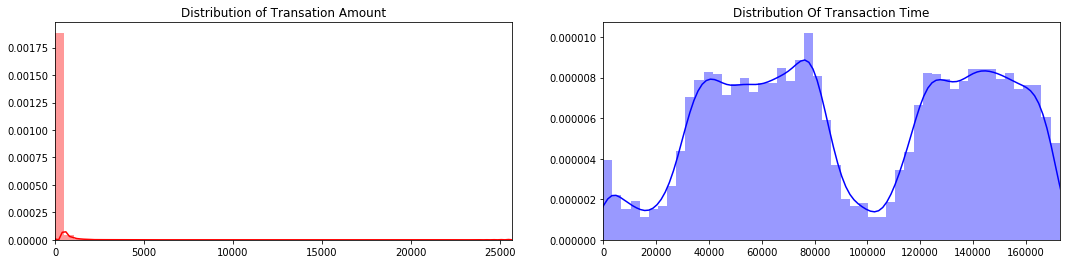

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
amount_val = df2['Amount'].values
time_val = df2['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title("Distribution of Transation Amount")
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title("Distribution Of Transaction Time")
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [171]:
scaler = StandardScaler()
rob_scaler = RobustScaler()

df2['std_amount'] = scaler.fit_transform(df2['Amount'].values.reshape(-1, 1))
df2['rob_amount'] = rob_scaler.fit_transform(df2['Amount'].values.reshape(-1, 1))
df2['loged_amount'] = np.log1p(df2['Amount'].values.reshape(-1, 1))

df2['std_time'] = scaler.fit_transform(df2['Time'].values.reshape(-1, 1))
df2['rob_time'] = rob_scaler.fit_transform(df2['Time'].values.reshape(-1, 1))
df2['loged_time'] = np.log1p(df2['Time'].values.reshape(-1, 1))


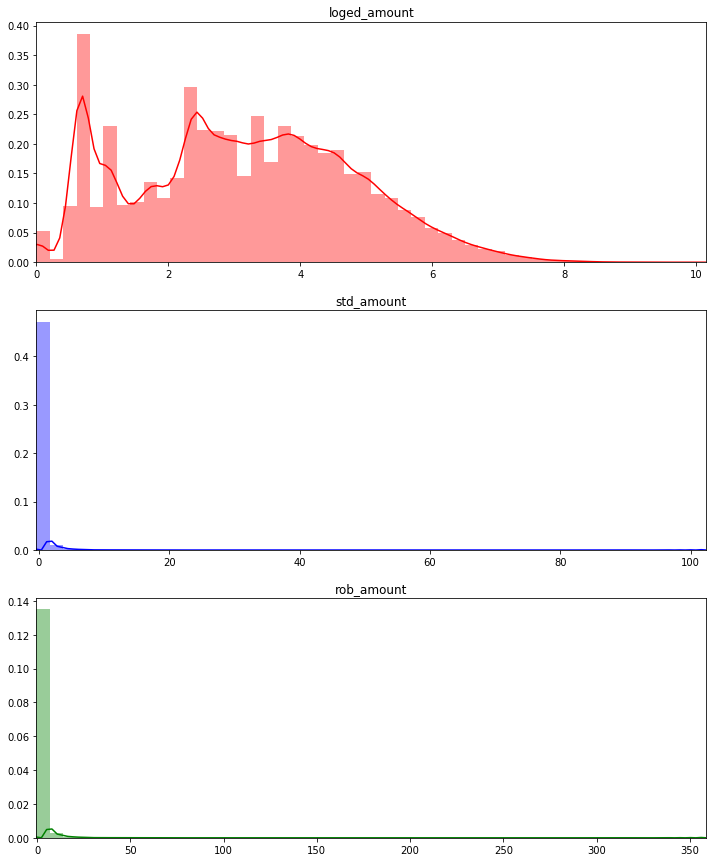

In [172]:
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
loged_amount = df2['loged_amount'].values
std_amount = df2['std_amount'].values
rob_amount= df2['rob_amount'].values

sns.distplot(loged_amount, ax=ax[0], color='r')
ax[0].set_xlim([min(loged_amount), max(loged_amount)])
ax[0].set_title("loged_amount")

sns.distplot(std_amount, ax=ax[1], color='b')
ax[1].set_xlim([min(std_amount), max(std_amount)])
ax[1].set_title("std_amount")

sns.distplot(rob_amount, ax=ax[2], color='g')
ax[2].set_xlim([min(rob_amount), max(rob_amount)])
ax[2].set_title("rob_amount")

plt.show()

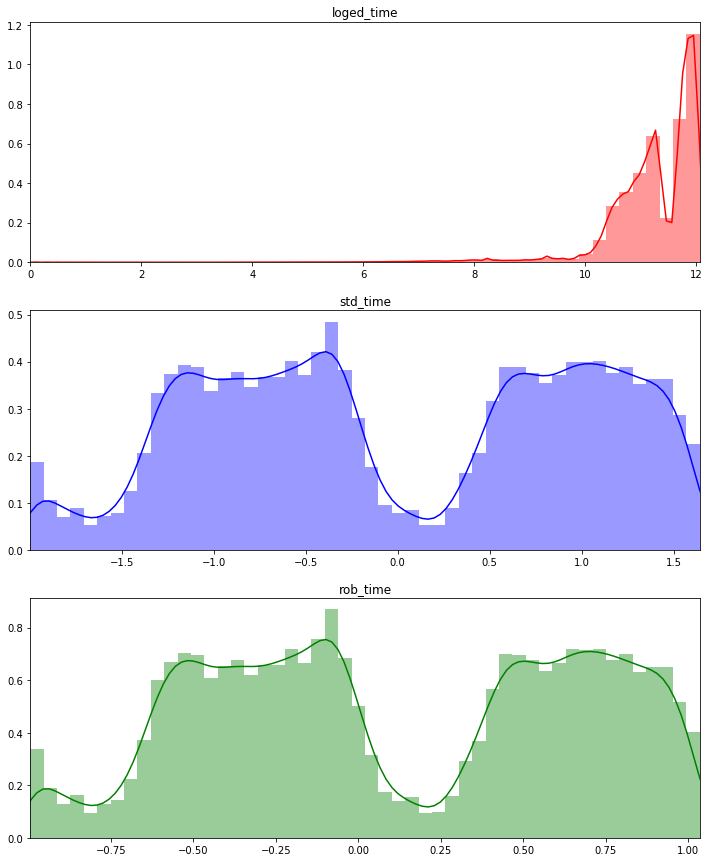

In [173]:
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
loged_time = df2['loged_time'].values
std_time = df2['std_time'].values
rob_time= df2['rob_time'].values

sns.distplot(loged_time, ax=ax[0], color='r')
ax[0].set_xlim([min(loged_time), max(loged_time)])
ax[0].set_title("loged_time")

sns.distplot(std_time, ax=ax[1], color='b')
ax[1].set_xlim([min(std_time), max(std_time)])
ax[1].set_title("std_time")

sns.distplot(rob_time, ax=ax[2], color='g')
ax[2].set_xlim([min(rob_time), max(rob_time)])
ax[2].set_title("rob_time")

plt.show()

I will select std_amount & rob_time 

In [174]:
df2.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class',
       'std_amount', 'rob_amount', 'loged_amount', 'std_time', 'rob_time',
       'loged_time'],
      dtype='object')

In [175]:
df2.drop(['loged_time','std_time','loged_amount','rob_amount','Time','Amount'], axis = 1, inplace=True)

In [176]:
df2.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'std_amount',
       'rob_time'],
      dtype='object')

In [122]:
X_train, X_test, y_train, y_test=train_test(df2)

In [145]:
def models_result():
    for m in models:
        print(m.__class__)
        modeling(m, x_train = X_train, x_test = X_test, y_train = y_train, y_test = y_test)
        print("-"*25)

In [147]:
models_result()

<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy : 1.00, precision : 0.87, recall : 0.63
f1-score : 0.73, auc : 0.82
-------------------------
<class 'lightgbm.sklearn.LGBMClassifier'>
accuracy : 1.00, precision : 0.92, recall : 0.76
f1-score : 0.84, auc : 0.88
-------------------------
<class 'xgboost.sklearn.XGBClassifier'>
accuracy : 1.00, precision : 0.90, recall : 0.75
f1-score : 0.82, auc : 0.87
-------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
accuracy : 1.00, precision : 0.94, recall : 0.73
f1-score : 0.82, auc : 0.87
-------------------------
<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
accuracy : 1.00, precision : 0.98, recall : 0.72
f1-score : 0.83, auc : 0.86
-------------------------


# Outlier process by IQR

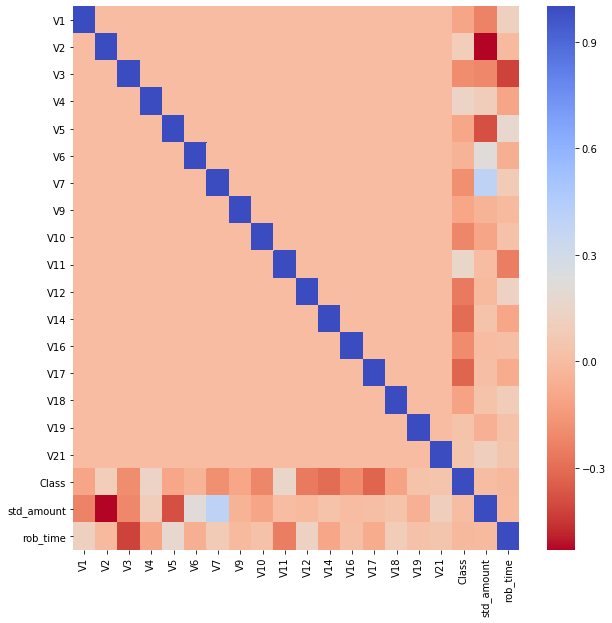

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), cmap='coolwarm_r')

In [177]:
df2.corr().Class.apply(lambda x : abs(x)).sort_values(ascending=False)

Class         1.000000
V17           0.326481
V14           0.302544
V12           0.260593
V10           0.216883
V16           0.196539
V3            0.192961
V7            0.187257
V11           0.154876
V4            0.133447
V18           0.111485
V1            0.101347
V9            0.097733
V5            0.094974
V2            0.091289
V6            0.043643
V21           0.040413
V19           0.034783
rob_time      0.012323
std_amount    0.005632
Name: Class, dtype: float64

Text(0.5, 1.0, 'V14 vs Class')

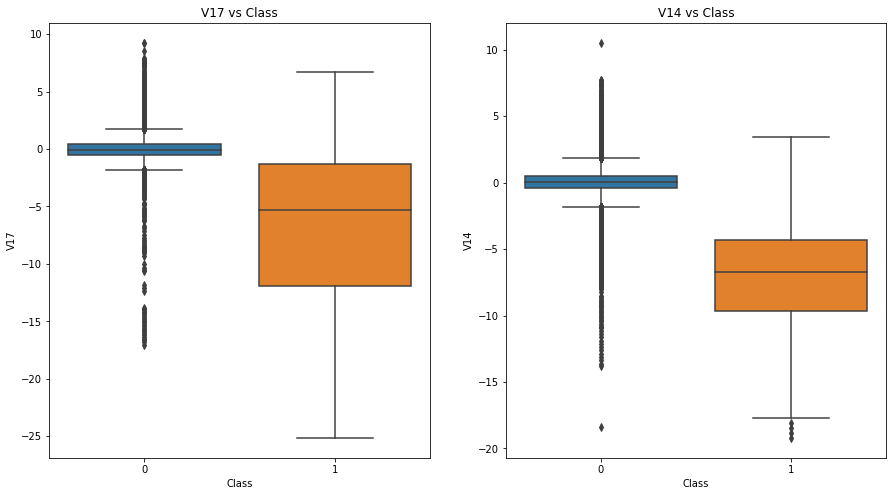

In [140]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x="Class", y="V17", data=df2, ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V14", data=df2, ax=axes[1])
axes[1].set_title('V14 vs Class')

Text(0.5, 1.0, 'V21 vs Class')

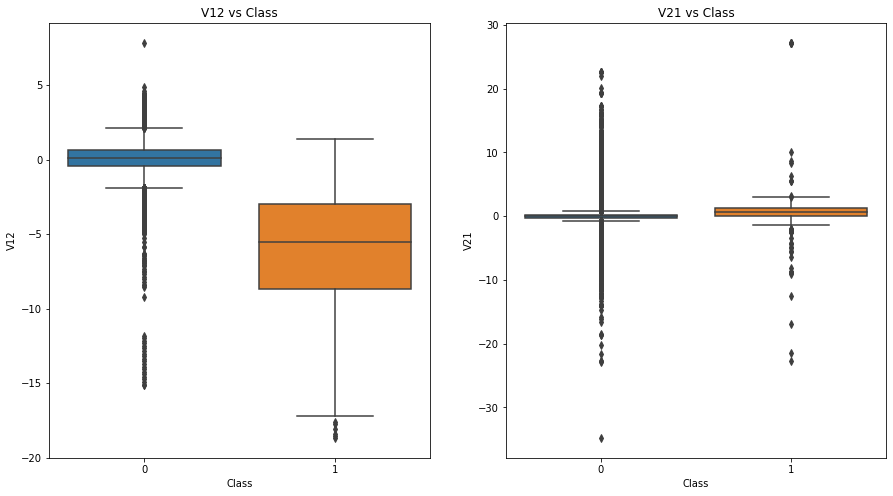

In [141]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x="Class", y="V12", data=df2, ax=axes[0])
axes[0].set_title('V12 vs Class')

sns.boxplot(x="Class", y="V21", data=df2, ax=axes[1])
axes[1].set_title('V21 vs Class')

In [178]:
def remove_outlier_test(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(len(outlier_index))
    return d_cp.drop(outlier_index, axis = 0)

In [179]:
df3 = remove_outlier_test(df2, 'V17')
df4 = remove_outlier_test(df2, 'V14')

7420
14149


In [180]:
X_train, X_test, y_train, y_test = train_test(df3)

In [183]:
df2.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [184]:
df3.Class.value_counts()

0    277292
1        95
Name: Class, dtype: int64

In [185]:
df4.Class.value_counts()

0    270596
1        62
Name: Class, dtype: int64

In [182]:
df2.shape,df3.shape

((284807, 20), (277387, 20))

In [181]:
models_result()

<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy : 1.00, precision : 1.00, recall : 0.33
f1-score : 0.50, auc : 0.67
-------------------------
<class 'lightgbm.sklearn.LGBMClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.38
f1-score : 0.55, auc : 0.69
-------------------------
<class 'xgboost.sklearn.XGBClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.33
f1-score : 0.50, auc : 0.67
-------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.33
f1-score : 0.50, auc : 0.67
-------------------------
<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.33
f1-score : 0.50, auc : 0.67
-------------------------


In [186]:
X_train, X_test, y_train, y_test = train_test(df4)

In [187]:
models_result()

<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy : 1.00, precision : 0.50, recall : 0.06
f1-score : 0.11, auc : 0.53
-------------------------
<class 'lightgbm.sklearn.LGBMClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.06
f1-score : 0.12, auc : 0.53
-------------------------
<class 'xgboost.sklearn.XGBClassifier'>
accuracy : 1.00, precision : 0.50, recall : 0.06
f1-score : 0.11, auc : 0.53
-------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.06
f1-score : 0.12, auc : 0.53
-------------------------
<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.06
f1-score : 0.12, auc : 0.53
-------------------------


# df3, df4 (remove outlier by target (Class) )

## remove too much datas (especially Class==1; default ), so result is worse

In [188]:
def remove_outlier_0(d_cp, column):
    #fraud_column_data = d_cp[d_cp['Class']==1][column]
    fraud_column_data = d_cp[d_cp['Class']==0][column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(len(outlier_index))
   
    return d_cp.drop(outlier_index, axis = 0)

In [189]:
def remove_outlier_1(d_cp, column):
    fraud_column_data = d_cp[d_cp['Class']==1][column]
    #fraud_column_data = d_cp[d_cp['Class']==0][column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(len(outlier_index))
    return d_cp.drop(outlier_index, axis = 0)

In [190]:
df5 = remove_outlier_0(df2, 'V17')
df6 = remove_outlier_0(df2, 'V14')
df7 = remove_outlier_1(df2, 'V17')
df8 = remove_outlier_1(df2, 'V14')

7038
13800
0
4


In [193]:
df_count=5
for df in [df5,df6,df7,df8]:
    print("")
    print("df"+str(df_count)+("-"*15))
    X_train, X_test, y_train, y_test = train_test(df)
    models_result()
    print("*"*25)
    print("")
    df_count+=1


df5---------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy : 1.00, precision : 1.00, recall : 0.88
f1-score : 0.94, auc : 0.94
-------------------------
<class 'lightgbm.sklearn.LGBMClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.87
f1-score : 0.93, auc : 0.93
-------------------------
<class 'xgboost.sklearn.XGBClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.90
f1-score : 0.95, auc : 0.95
-------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.90
f1-score : 0.95, auc : 0.95
-------------------------
<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
accuracy : 1.00, precision : 1.00, recall : 0.88
f1-score : 0.94, auc : 0.94
-------------------------
*************************


df6---------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy : 1.00, precision : 0.99, recall : 0.87
f1-score : 0.93, auc : 0.93
-------------------------

# TODO:

## 1. change thresholds on pred_function -> expect diff precision / recall 

## 2. Sampling ( over sampling / under sampling)

## 3. hyperparameter tuning (grid / random search)

## 4. stacking 


## always need to more EDA (make graph -> find some pattern -> update data -> try on models)

# Below ,, sampling example

In [ ]:
cv = 5  

RegressionModel    = LogisticRegression()

# here are some other models you could try. You can also try grid searching their hyperparameters
RandomForrestModel = RandomForestClassifier()
ExtraTreesModel    = ExtraTreesClassifier()
AdaBoostModel      = AdaBoostClassifier()

In [ ]:
# Logistic regression score with Random Over-sampling
print("Random over-sampling")
score = imbalanced_cross_validation_score(RegressionModel, x, y, cv, pr_auc_score, RandomOverSampler())
print("Cross-validated AUPRC score: %.2f"%score)

# Logistic regression score with SMOTE
print("SMOTE over-sampling")
score = imbalanced_cross_validation_score(RegressionModel, x, y, cv, pr_auc_score, SMOTE())
print("Cross-validated AUPRC score: %.2f"%score)

# Logistic regression score with ADASYN
print("ADASYN over-sampling")
score = imbalanced_cross_validation_score(RegressionModel, x, y, cv, pr_auc_score, ADASYN())
print("Cross-validated AUPRC score: %.2f"%score)

# Logistic regression score with Random Under Sampling
print("Random under-sampling")
score = imbalanced_cross_validation_score(RegressionModel, x, y, cv, pr_auc_score, RandomUnderSampler())
print("Cross-validated AUPRC score: %.2f"%score)

In [ ]:
# for fun, let's plot one of the precision-recall curves that is computed above
#
sampler = SMOTE()
skf = StratifiedKFold(n_splits=cv, random_state=0, shuffle=False)
clf = RegressionModel

train_idx, test_idx = skf.split(x,y).__next__()
xfold_train_sampled, yfold_train_sampled = sampler.fit_sample(x[train_idx],y[train_idx])

clf.fit(xfold_train_sampled, yfold_train_sampled)

precisions, recalls,_ = precision_recall_curve(y[test_idx], clf.predict_proba(x[test_idx])[:,1], pos_label=1)

plt.step(recalls, precisions, color='b', alpha=0.2,
         where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')